In [13]:
from langgraph.graph import StateGraph , START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict , Annotated , Literal
from dotenv import load_dotenv 
from pydantic import BaseModel, Field
import os
import operator

In [2]:
class QuadState(TypedDict):
    a : int
    b : int 
    c : int

    equation : str
    discriminant : float
    result : str

In [10]:
def show_equation(state : QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    equation = f"The quadratic equation is: {a}x^2 + {b}x + {c} = 0"
    return {'equation': equation}

def calc_discriminant(state : QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    D = b**2 - 4*a*c
    return {'discriminant': D}

def real_roots(state : QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    D = state['discriminant']
    root1 = (-b + D**0.5) / (2*a)
    root2 = (-b - D**0.5) / (2*a)
    result = f"The equation has two real roots: {root1} and {root2}"
    return {'result': result}

def repeated_roots(state : QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    root = -b / (2*a)
    result = f"The equation has one repeated real root: {root}"
    return {'result': result}

def no_real_roots(state : QuadState) -> QuadState:
    result = "The equation has no real roots."
    return {'result': result}


In [14]:
def check_condition(state : QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    D = state['discriminant']
    if D > 0:
        return 'real_roots'
    elif D == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

In [19]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calc_discriminant',calc_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)


graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calc_discriminant')
graph.add_conditional_edges('calc_discriminant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)

workflow = graph.compile()


In [24]:
initial_state = {'a': 2, 'b': 4, 'c': 2}

final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 2, 'b': 4, 'c': 2, 'equation': 'The quadratic equation is: 2x^2 + 4x + 2 = 0', 'discriminant': 0, 'result': 'The equation has one repeated real root: -1.0'}


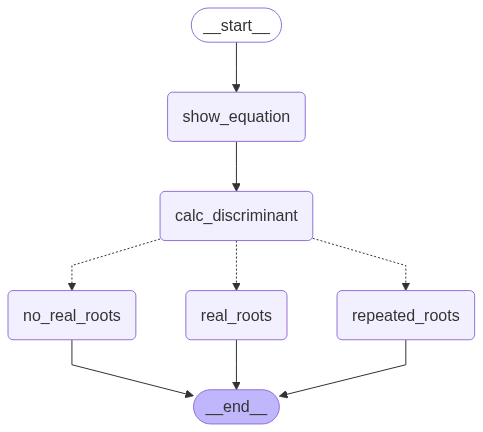

In [20]:
workflow